## Time series tensor start
Here you can learn the basic use of tensor in time series data.

Import spartan package.<br/>
Remember to install spartan from pip or clone the project from github before doing this.

In [39]:
import spartan as st
import pandas as pd

First, we load data from origin file by ```loadTensor``` function.<br/>
**path**: support relative or absolute path of directory.<br/>
**col_idx**: id of chosen columns in data file, its order also effects the reading order.<br/>
**col_types**: data type of each chosen column, default is inferred by pandas.

In [65]:
tensor = st.loadTensor(path="inputData/ecg_timeseries_small.zip", sep=' ')

## Drew testing to get hang of spartan 
testing = True
if testing : 
    LRCXfilepath = 'inputData/LRCX-1/05-01-23_Dataset3_SJSUcase.csv'
    kwargs = {
            'header': 0,
            'usecols': [0, 36, 38, 120, 77 ]
            }
    if not kwargs['header'] is None:
        df = pd.read_csv(LRCXfilepath)
        labels = df.columns[kwargs['usecols'][1:]]
        print(f"{labels=}, code doesn't want time label which must be firt usecols index")
    tensor = st.loadTensor(path=LRCXfilepath, col_types = [float]*len(kwargs['usecols']), sep=',', **kwargs)

labels=Index(['  CurrentMMPPhase ', '  ESCBiasVoltage_AI V',
       '  TCPMatchCurrentPhaseDifference_AI deg', '  IB5Value '],
      dtype='object'), code doesn't want time label which must be firt usecols index


Then, we use ```toDtensor``` function to split time column and value columns. ```DTensor``` is designed for dense tensor.<br/>
**hastticks**: indicate whether tensor has a column for time, default is False and will return None for time

In [66]:
time, value = tensor.toDTensor(hastticks=True)

Finally, ```st.Timeseries``` is used to construct ```Timeseries``` object.<br/>
**val_tensor**: value tensor<br/>
**time_tensor**: time tensor, default is None<br/>
**labels**: list of column names, default is None<br/>
**freq**: frequency of this series, default is 1<br/>
**startts**: start timetick, default is 0<br/>

Timeseries can be constructed in many styles. Among all parameters, only val_tensor is necessary.<br/>
Normally, val_tensor, time_tensor, and labels are passed in. Length of labels and val_tensor will be determined to be equal. And meanwhile, freq, startts will be invalid and inferred from time tensor.

In [67]:
time_series = st.Timeseries(value, time)
if testing :
    time_series = st.Timeseries(value, time, labels=labels)
    print(time_series)

         Time    CurrentMMPPhase     ESCBiasVoltage_AI V  \
0       0.097                 0.0              -18.31055   
1       0.197                 0.0              -18.31055   
2       0.297                 0.0              -18.31055   
3       0.397                 0.0              -18.31055   
4       0.497                 0.0              -18.31055   
...       ...                 ...                    ...   
9038  903.897                 4.0              -17.63916   
9039  903.997                 4.0              -17.82227   
9040  904.097                 4.0              -16.84570   
9041  904.197                 4.0              -16.84570   
9042  904.297                 4.0              -17.82227   

        TCPMatchCurrentPhaseDifference_AI deg    IB5Value   
0                                        0.00     -4.75708  
1                                        0.00     -4.75708  
2                                        0.00     -4.78455  
3                                  

If labels are missing, program will defaultly assign a list of labels, as ['dim_1', 'dim_2', ...]

In [69]:
time_series = st.Timeseries(value, time)
if testing :
    time_series = st.Timeseries(value, time, labels=labels)

<img src="images/timeseries_1.png" width="700"/> 

Call ```st.plot_timeseries``` to plot time series.<br/>
**chosen_labels**: two-dimension list, whose entries are dimensions to be plotted in each subplot.

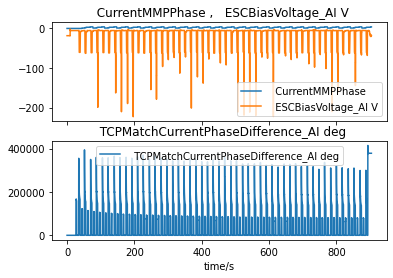

In [71]:
if testing:
    chosen_labels = [[labels[0], labels[1]], [labels[2]]]
    st.plot_timeseries(time_series, chosen_labels=chosen_labels)
else:
    st.plot_timeseries(time_series, chosen_labels=[['dim_0', 'dim_1'], ['dim_1']])

If time tensor is missed, program will automatically create a time tensor with parameter freq and startts.

In [64]:
time_series = st.Timeseries(value, freq=360, startts=100, labels=['col_1', 'col_2'])

<img src="images/timeseries_2.png" width="700"/> 

Function ```resample``` resamples series data with a new frequency.<br/>
**resampled_freq**: resampled frequency<br/>
**inplace**: update origin object or return a new object, default is False

In [ ]:
resampled_time_series = time_series.resample(180)

<img src="images/timeseries_3.png" width="700"/> 

In [ ]:
resampled_time_series.resample(720, inplace=False)

<img src="images/timeseries_4.png" width="700"/> 

Function ```add_columns``` add new equal-length columns to Time series object.<br/>
**attrs**: list or string of column names<br/>
**values**: values of columns<br/>
if type of values is int or float, function will create a equal-length ndarray filled with values<br/>
if type of values is DTensor or list, function will judge the length, then add columns<br/>
default is None<br/>
**inplace**: update origin object or return a new object, default is False

In [ ]:
import numpy as np
added_series = time_series.add_columns(['label_1', 'label_2'], [1, 2], inplace=False)

<img src="images/timeseries_5.png" width="700"/> 

Function ```combine``` combine self with columns of other timeseries objects which have the same length.<br/>
**series**: list of Timeseries object or Timeseries object<br/>
**inplace**: update origin object or return a new object, default is False

In [ ]:
combined_series = time_series.combine(added_series, inplace=False)

<img src="images/timeseries_6.png" width="700"/> 

Function ```extract``` extract specific columns from self..<br/>
**attrs**: list or string of column names, default is None<br/>
**inplace**: update origin object or return a new object, default is False

In [ ]:
extracted_series = added_series.extract(['label_1', 'col_1'], inplace=False)

<img src="images/timeseries_7.png" width="700"/> 

Function ```concat``` concatenate self with another timeseries object with the same dimension.<br/>
**series**: list of Timeseries object or Timeseries object<br/>
**inplace**: update origin object or return a new object, default is False

In [ ]:
concatted_series = time_series.concat(time_series, inplace=False)

<img src="images/timeseries_8.png" width="700"/> 

In [ ]:
concatted_series.concat([time_series, time_series], inplace=True)

<img src="images/timeseries_9.png" width="700"/> 

Function ```cut``` cut sub sequence from chosen attribute columns.<br/>
**start**: start timetick or point, default is None, cut from the very front position.<br/>
**end**: end timetick or point, default is None, cut to the very last position.<br/>
**attrs**: list or string of column names, return the all columns<br/>
**form**: type of start and end<br/>
if 'point', start and end stand for positions of points<br/>
if 'time', start and end stand for timeticks of points<br/>
default is 'point'<br/>
**inplace**: update origin object or return a new object, default is False

In [ ]:
cut_point_series = time_series.cut(attrs=['col_1'], start=0, end=1000, inplace=False)

<img src="images/timeseries_10.png" width="700"/> 

In [ ]:
cut_time_series = time_series.cut(start=103, end=105, form='time', inplace=False)

<img src="images/timeseries_11.png" width="700"/> 

Function ```normalize``` normalize data in value_tensor.<br/>
**attrs**: list or string of column names, default is None<br/>
**strategy**: strategy for normalization<br/>
if 'minmax', normalize to [-1, 1]<br/>
default is 'minmax'<br/>
**inplace**: update origin object or return a new object, default is False

In [ ]:
normalized_series = time_series.normalize(inplace=False)

<img src="images/timeseries_12.png" width="700"/> 